In [1]:
from math import cos
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(12,12)})

In [3]:
#Se define la ecuación diferencial junto con sus parámetros.
def fun(t, z, m):
    
        # x''(t) + δx'(t) + αx + βx^3 = γCos(ωt)
        # dx/dt = y
        #Reordenando la primera ecuación en base al cambio de variable y despejando dy/dt
        # dy/dt = - δy - αx - βx^3 + γ*Cos(ωt)
        
    """"
        dx/dt = y
        dy/dt = - δ*y - α*x - β*x**3 + γ*cos(ω*t)
    """

    δ, α, β, γ, ω = m                             #Parámetros de la integral
    x, y = z                                      #Parámetros de integración
    fun = [y, - δ*y - α*x - β*x**3 + γ*cos(ω*t)]  #Función a integrar

    return fun

In [4]:
#Se crea un solucionador de la ecuación diferencial usando el método "runge_kutta_dopri5"
sol = ode(fun)
sol.set_integrator('dopri5')

In [6]:
#Se dan los parámetros de la actividad.
α = -1.0
δ = 0.3
β = 1.0
ω = 1.2
γi = [0.20, 0.28, 0.29, 0.37, 0.50, 0.65]

#Se crean arreglos para los datos de cada γ.
x = []
y = []
gamma = []


for i in range(0, len(γi)):
    
    #Se definen las condiciones iniciales.
    t0 = 0.0
    z0 = [1.0, 0.0] 
    sol.set_initial_value(z0, t0)

    γ = γi[i]
    val = δ, α, β, γ, ω
    #Se asignan los parámetros a la solución.
    sol.set_f_params(val)
    
    #Se crean arreglos de valores de tiempo t y arreglos que almacenen los valores
    t1 = 20
    n = 1000
    t = np.linspace(t0, t1, n)
    solv = np.empty((n, 2))
    solv[0] = z0
      
    #Se llama al integrador para que solucione usando tiempo "k"
    k = 1
    
    while sol.successful() and sol.t < t1:
        sol.integrate(t[k])
        solv[k] = sol.y
        k += 1
        
    xi = solv[:,0]
    yi = solv[:,1]
                
    #Se actualizan las condiciones iniciales
    gamma.append(γ)
    x.append(xi)
    y.append(yi)

No handles with labels found to put in legend.


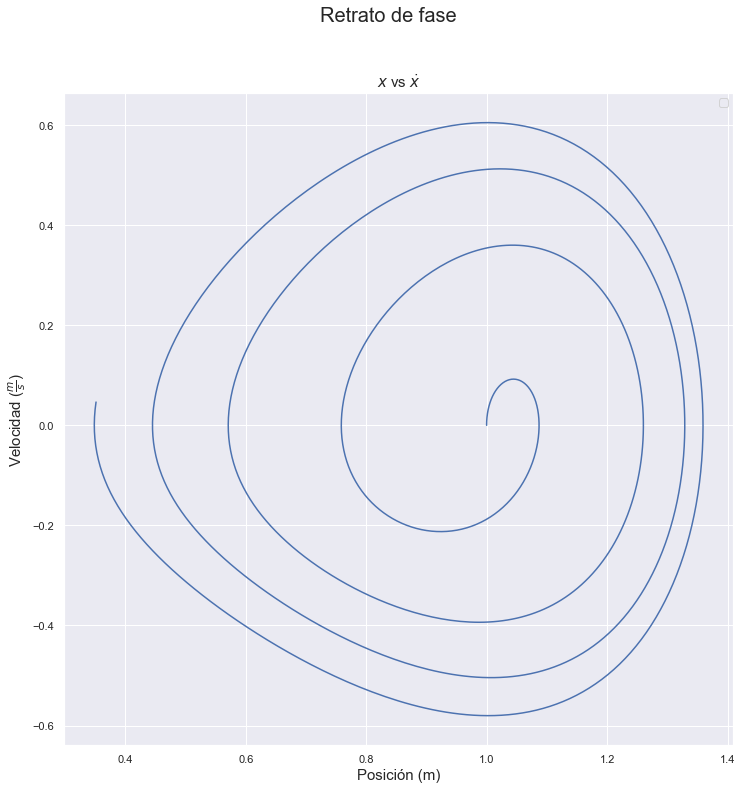

No handles with labels found to put in legend.


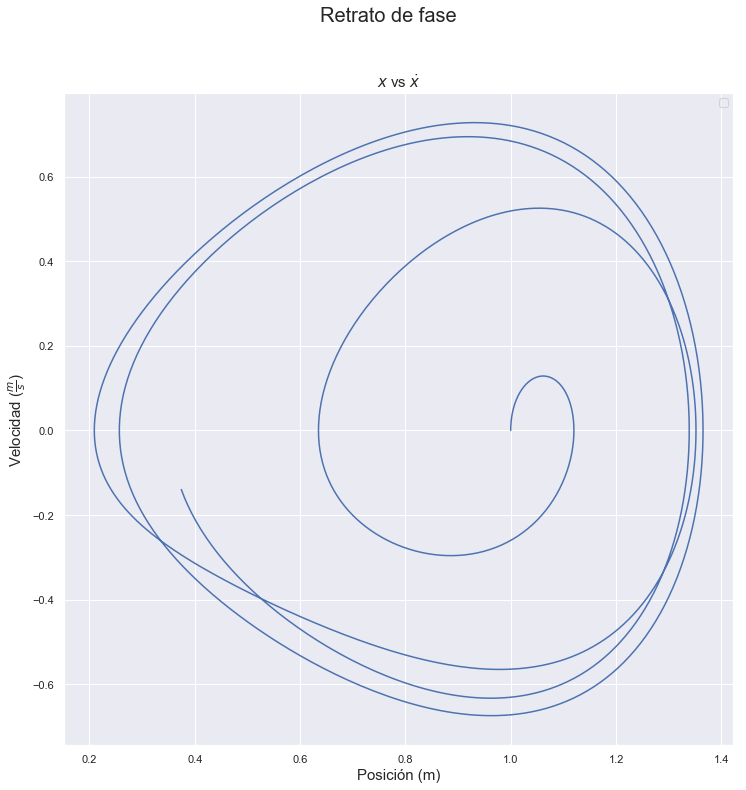

No handles with labels found to put in legend.


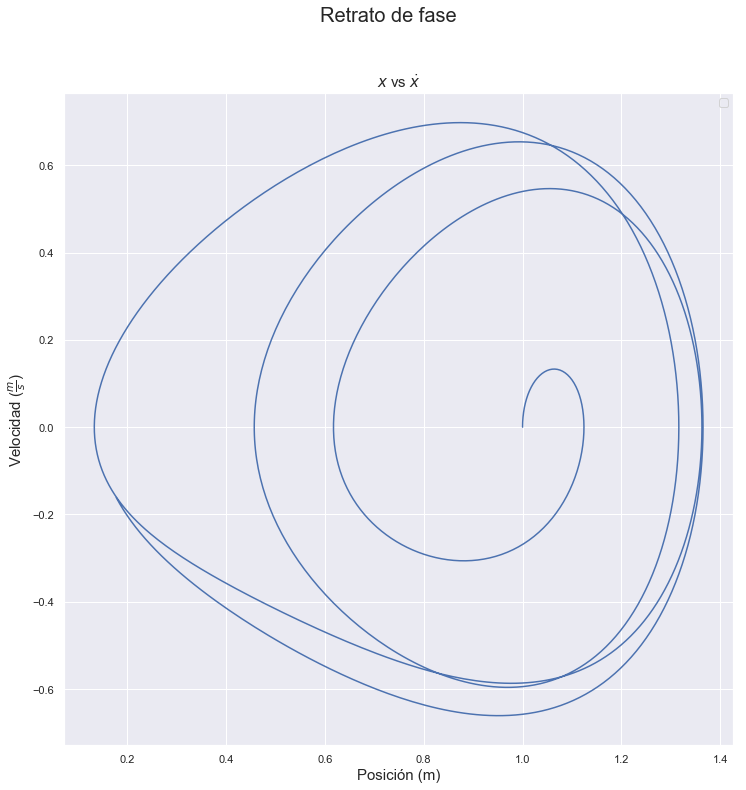

No handles with labels found to put in legend.


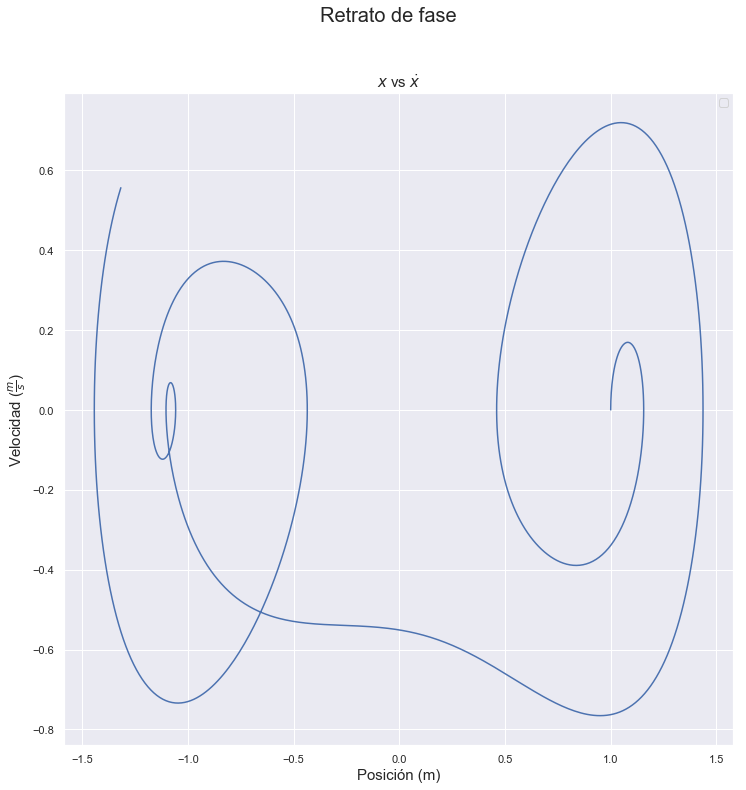

No handles with labels found to put in legend.


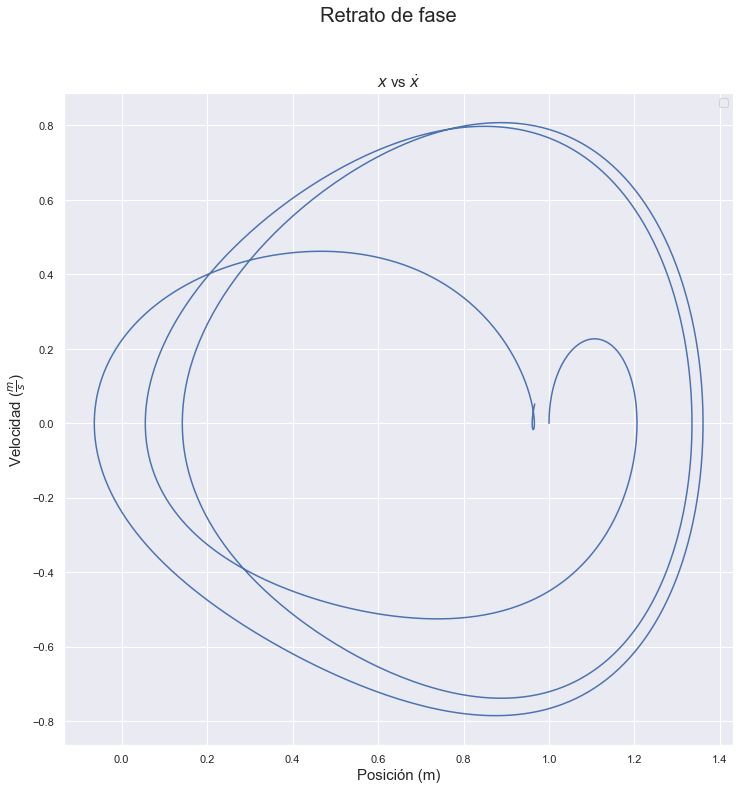

No handles with labels found to put in legend.


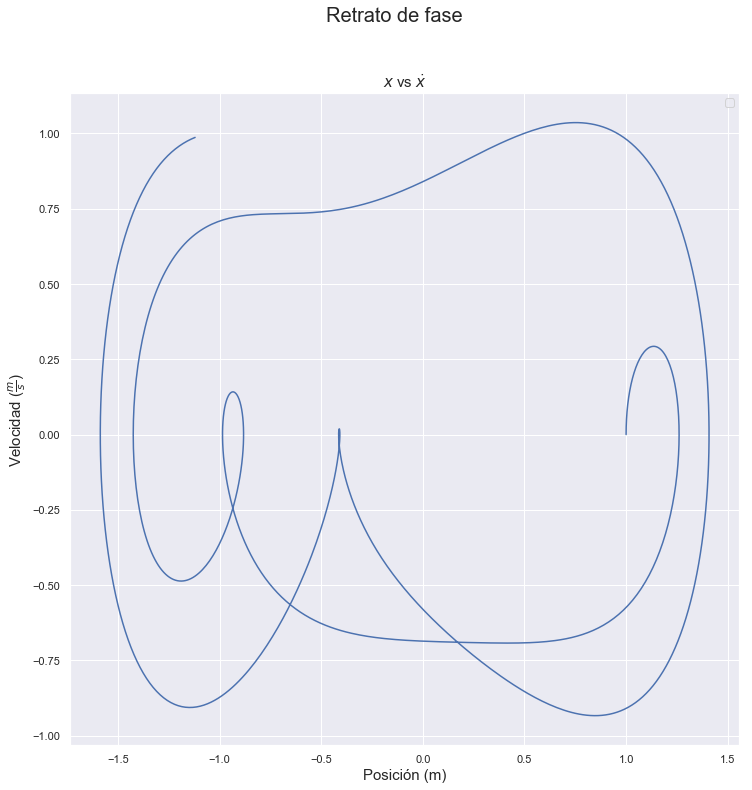

In [8]:
#Se grafica el retraso de fase
for i in range(0, len(γi)):
    plt.figure()
    plt.suptitle('Retrato de fase', fontsize = 20)
    plt.title(r'$x$ vs $\dot{x}$', fontsize = 15)
    plt.plot(x[i],y[i])
    plt.xlabel('Posición (m)', fontsize = 15)
    plt.ylabel(r'Velocidad ($\frac{m}{s}$)', fontsize = 15)
    plt.grid(True)
    plt.legend()
    plt.savefig('i',plt=2000)
    plt.show()

No handles with labels found to put in legend.


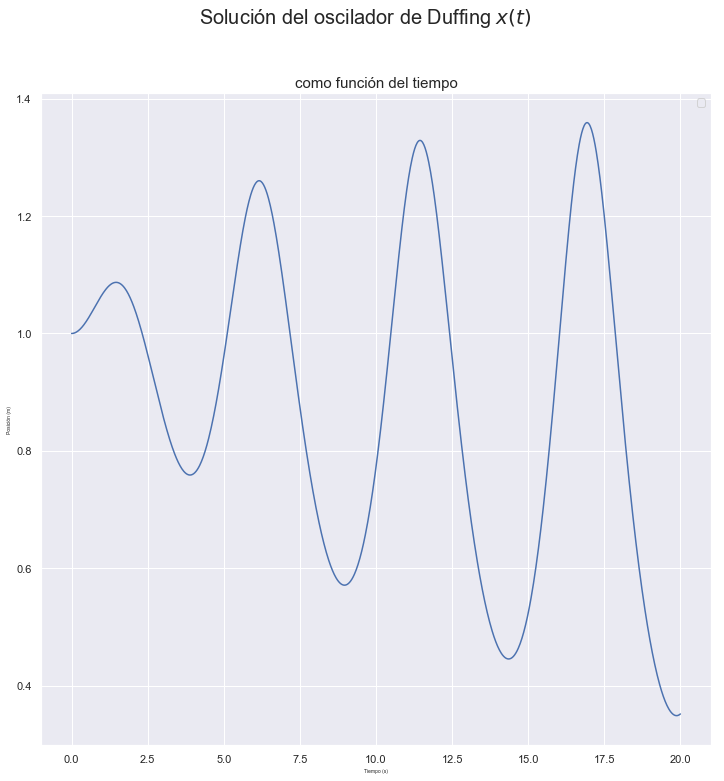

No handles with labels found to put in legend.


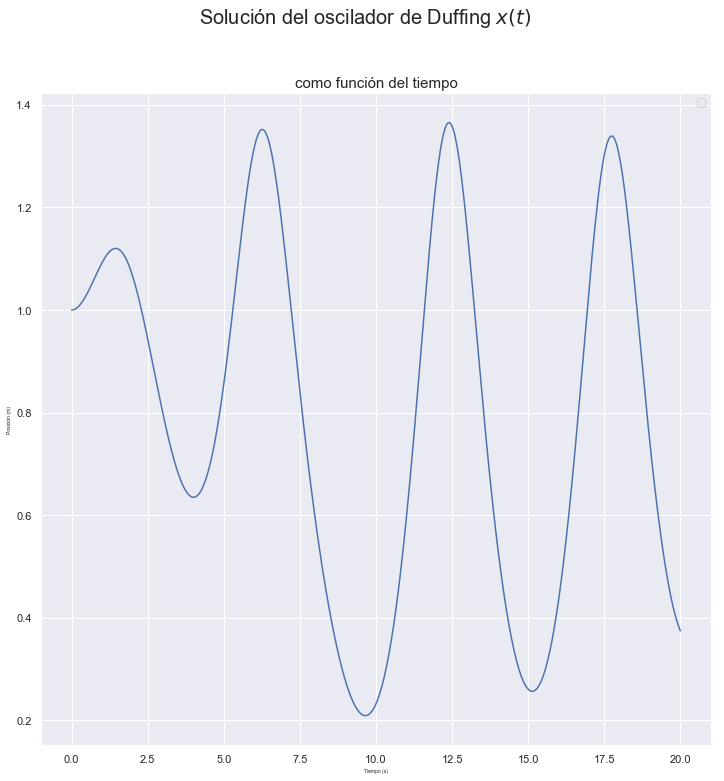

No handles with labels found to put in legend.


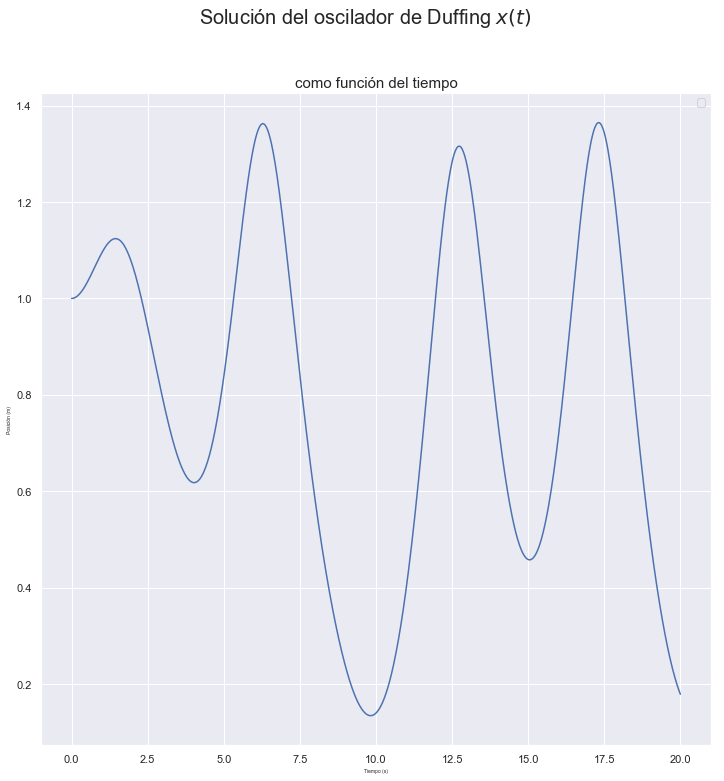

No handles with labels found to put in legend.


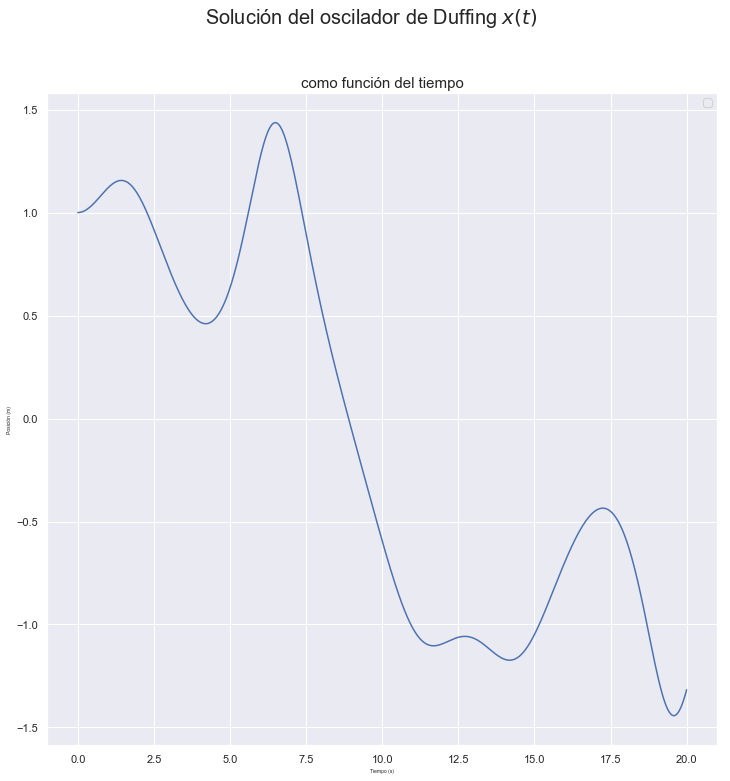

No handles with labels found to put in legend.


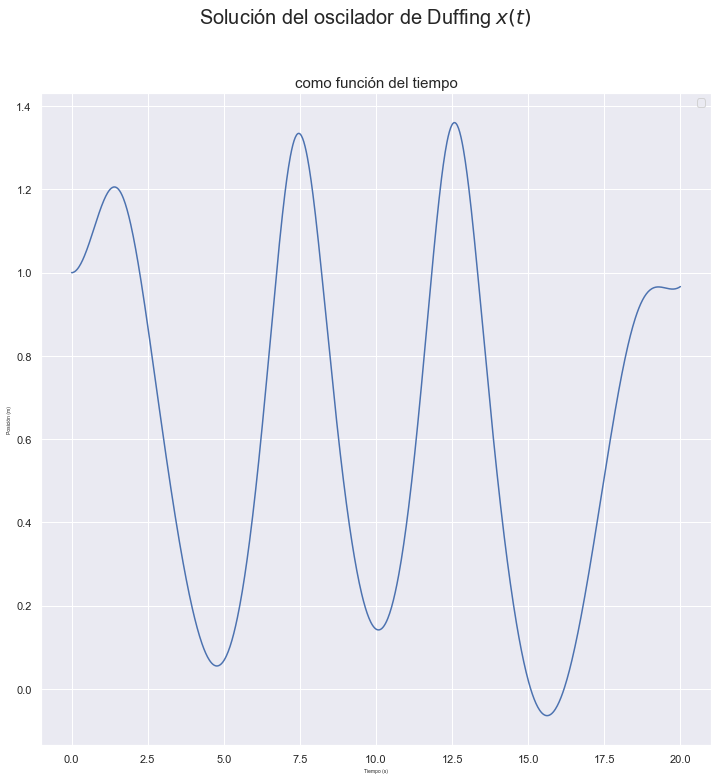

No handles with labels found to put in legend.


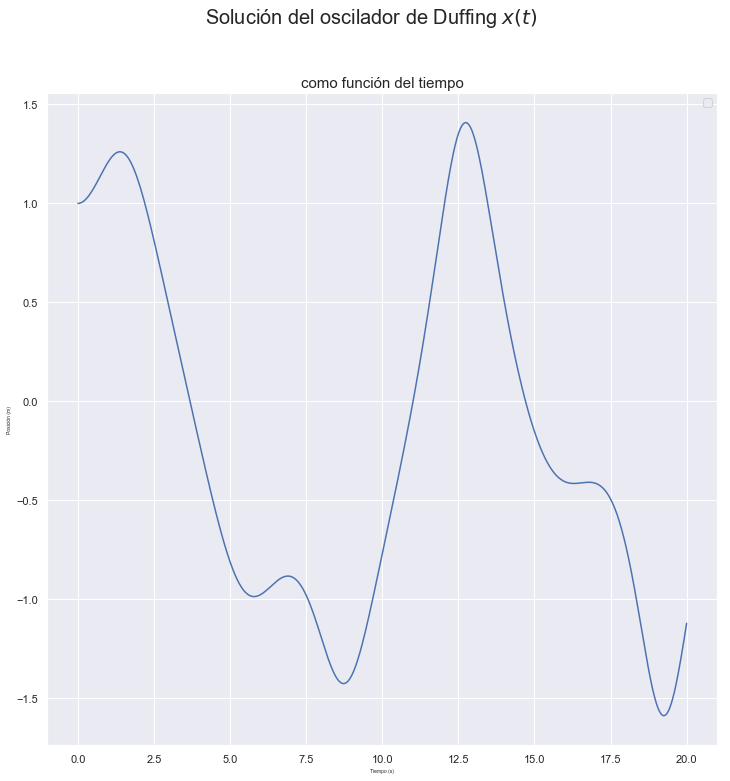

In [10]:
#Se grafica x vs t.
for i in range(0,len(gamma)):
    plt.figure()
    plt.suptitle(r'Solución del oscilador de Duffing $x(t)$', fontsize = 20)
    plt.title('como función del tiempo', fontsize = 15)
    plt.plot(t, x[i])
    plt.ylabel('Posición (m)', fontsize = 5)
    plt.xlabel('Tiempo (s)', fontsize = 5)
    plt.grid(True)
    plt.legend()
    plt.show()